In [1]:
# This code evolves the Einstein-Klein Gordon system of equations in the 3+1 decomposition 
# using the reference metric approach in arXiv:1211.6632
# to avoid coordinate singularities in the right hand side evolution
# Spherical symmetry is assumed and the outer boundary condition is 
# extrapolation at zeroth order

# load the required python modules
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

# homemade code
from myparams import *                         # go here to change the grid and other params
from source.rhsevolution import *              # go here to look at how the evolution works
from source.mytests import *                   # go here to change the test conditions
from source.diagnostics import *               # go here to change the  diagnostics

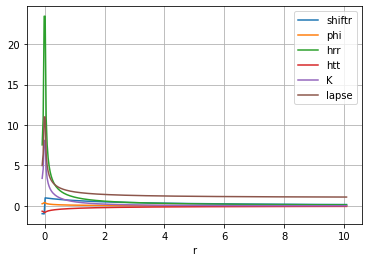

In [2]:
# Test the rhs values, use eddington finkelstein which has non trivial Kij and shift
initial_vars_values = get_test_vars_values_bh()

#unpackage the vector for readability
u, v , phi, hrr, htt, hpp, K, arr, att, app, lambdar, shiftr, br, lapse = unpack_vars_vector(initial_vars_values)

#plot initial conditions
plt.xlabel('r')
plt.plot(r, shiftr, label='shiftr')
plt.plot(r, phi, label='phi')
plt.plot(r, hrr, label='hrr')
plt.plot(r, htt, label='htt')
#plt.plot(r, lambdar, label='lambdar')
#plt.plot(r, arr, label='arr')
plt.plot(r, K, label='K')
plt.plot(r, lapse, label='lapse')
#plt.ylim(-20.1,20.1)
plt.legend(loc='best')
plt.grid()

khere = K

In [3]:
solution = get_rhs(initial_vars_values, 0.0, 0., 0.)

#unpackage the vector for readability
u, v, phi, hrr, htt, hpp, K, arr, att, app, lambdar, shiftr, br, lapse = unpack_vars_vector(solution)

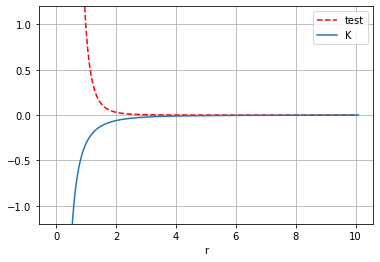

In [6]:
#plot rhs - all those for the metric components should be zero

#H = 2.0/r
#dHdr = -2.0/r/r
#alp = np.sqrt(1+H)
#grr = 1+H
#Kij2 = 1/alp/alp * (dHdr*dHdr/grr/grr*((1 - H/2/grr)**2.0) + 2.0*r*r*H*H/grr/grr*(r**(-4)))

# DEBUGGING D2lapse term in dKdt
denom = 3*r**6.0*(abs(2.0/r+1))**(7./6.0)
numer = 7+3*r
test = numer/denom

plt.xlabel('r')
#plt.plot(r, phi, label='phi')
#plt.plot(r, hrr, label='hrr')
#plt.plot(r, htt, label='htt')
plt.plot(r, test, 'r--',label='test')
#plt.plot(r, lambdar, label='lambdar')
#plt.plot(r, arr, label='arr')
#plt.plot(r, att, label='att')
plt.plot(r, K, label='K')
plt.ylim(-1.2,1.2)
#plt.xlim(0.0,5.0)
plt.legend(loc='best')
plt.grid()